In [1]:
from requests import get

response = get('https://newyork.craigslist.org/search/mnh/apa?hasPic=1') 
from bs4 import BeautifulSoup
html_soup = BeautifulSoup(response.text, 'html.parser')

posts = html_soup.find_all('li', class_= 'result-row')
print(type(posts)) 
print(len(posts)) # Get the amount of postings per page


<class 'bs4.element.ResultSet'>
120


In [150]:
posts[0]

<li class="result-row" data-pid="6998352621">
<a class="result-image gallery" data-ids="1:00a0a_lxYM4babjqA,1:00y0y_a4X3UiOdIoc,1:00h0h_5CmW1P6ZokG,1:00T0T_3W8YGOXPVfo,1:00T0T_1GYcWJcJdDL,1:00A0A_7BPd11il8n3,1:01111_AI9zfRzSTE,1:00C0C_95OGV6T3F1v,1:00505_94XobJJoz1D,1:01515_8RSs8JPAVTr,1:00o0o_2S8wT3LL5q9,1:00y0y_eymciO4ikhF" href="https://newyork.craigslist.org/mnh/apa/d/new-york-no-fee-beautiful-studio/6998352621.html">
<span class="result-price">$3048</span>
</a>
<p class="result-info">
<span class="icon icon-star" role="button">
<span class="screen-reader-text">favorite this post</span>
</span>
<time class="result-date" datetime="2019-10-12 18:40" title="Sat 12 Oct 06:40:21 PM">Oct 12</time>
<a class="result-title hdrlnk" data-id="6998352621" href="https://newyork.craigslist.org/mnh/apa/d/new-york-no-fee-beautiful-studio/6998352621.html">NO FEE- Beautiful studio apartment with large private terrace</a>
<span class="result-meta">
<span class="result-price">$3048</span>
<span class="

In [10]:
from time import sleep
import re
from random import randint 
from warnings import warn
from time import time
from IPython.core.display import clear_output
import numpy as np

#find the total number of posts 
results_num = html_soup.find('div', class_= 'search-legend')
results_total = int(results_num.find('span', class_='totalcount').text) #The total count of posts as the upper bound of the pages array

#each page has 119 posts so each new page is defined by s=120, s=240, s=360 .... 
pages = np.arange(0, results_total+1, 120)

iterations = 0

post_timing = []
post_hoods = []
post_title_texts = []
bedroom_counts = []
sqfts = []
post_links = []
post_prices = []


for page in pages:
    
   
    response = get("https://newyork.craigslist.org/search/mnh/apa?" 
                   + "s=" 
                   + str(page) #the page number 
                   + "&hasPic=1"
                   + "&availabilityMode=0")
    sleep(randint(1,5))
     
    #if page returns status other than 200 return warning
    if response.status_code != 200:
        warn('Request: {}; Status code: {}'.format(requests, response.status_code))
        
    
    page_html = BeautifulSoup(response.text, 'html.parser')
    
  
    posts = html_soup.find_all('li', class_= 'result-row')
        
    
    for post in posts:

        if post.find('span', class_ = 'result-hood') is not None: # if not missing neighborhood info 

            #add post date-time posted to list of date times
            post_datetime = post.find('time', class_= 'result-date')['datetime']
            post_timing.append(post_datetime)

            #neighborhoods 
            post_hood = post.find('span', class_= 'result-hood').text
            post_hoods.append(post_hood)

            #title text
            post_title = post.find('a', class_='result-title hdrlnk')
            post_title_text = post_title.text
            post_title_texts.append(post_title_text)

            #post link
            post_link = post_title['href']
            post_links.append(post_link)
            
            #post prices
            post_price = int(post.a.text.strip().replace("$", "")) 
            post_prices.append(post_price)
            
            if post.find('span', class_ = 'housing') is not None:
                
                #if the first element is square footage
                if 'ft2' in post.find('span', class_ = 'housing').text.split()[0]:
                    
                    #make bedroom nan
                    bedroom_count = np.nan
                    bedroom_counts.append(bedroom_count)
                    
                    #make sqft the first element
                    sqft = int(post.find('span', class_ = 'housing').text.split()[0][:-3])
                    sqfts.append(sqft)
                    
                #if the length of the housing element is more than 2
                elif len(post.find('span', class_ = 'housing').text.split()) > 2:
                    
                    #element 0 will be bedroom count
                    bedroom_count = post.find('span', class_ = 'housing').text.replace("br", "").split()[0]
                    bedroom_counts.append(bedroom_count)
                    
                    #sqft will be number 3
                    sqft = int(post.find('span', class_ = 'housing').text.split()[2][:-3])
                    sqfts.append(sqft)
                    
                #if there is num bedrooms but no sqft
                elif len(post.find('span', class_ = 'housing').text.split()) == 2:
                    
                    
                    bedroom_count = post.find('span', class_ = 'housing').text.replace("br", "").split()[0]
                    bedroom_counts.append(bedroom_count)
                    
                    
                    sqft = np.nan
                    sqfts.append(sqft)                    
                
                else:
                    bedroom_count = np.nan
                    bedroom_counts.append(bedroom_count)
                
                    sqft = np.nan
                    sqfts.append(sqft)
                
            #if none of those conditions apply, make bedroom nan   
            else:
                bedroom_count = np.nan
                bedroom_counts.append(bedroom_count)
                
                sqft = np.nan
                sqfts.append(sqft)
          
    iterations += 1
    print("Page " + str(iterations) + " scraped successfully!")

print("\n")
print("Scrape complete!")

Page 1 scraped successfully!
Page 2 scraped successfully!
Page 3 scraped successfully!
Page 4 scraped successfully!
Page 5 scraped successfully!
Page 6 scraped successfully!
Page 7 scraped successfully!
Page 8 scraped successfully!
Page 9 scraped successfully!
Page 10 scraped successfully!
Page 11 scraped successfully!
Page 12 scraped successfully!
Page 13 scraped successfully!
Page 14 scraped successfully!
Page 15 scraped successfully!
Page 16 scraped successfully!
Page 17 scraped successfully!
Page 18 scraped successfully!
Page 19 scraped successfully!
Page 20 scraped successfully!
Page 21 scraped successfully!
Page 22 scraped successfully!
Page 23 scraped successfully!
Page 24 scraped successfully!
Page 25 scraped successfully!
Page 26 scraped successfully!


Scrape complete!


In [11]:
import pandas as pd

ny_apts = pd.DataFrame({'posted': post_timing,
                       'neighborhood': post_hoods,
                       'post title': post_title_texts,
                       'number bedrooms': bedroom_counts,
                        'sqft': sqfts,
                        'URL': post_links,
                       'price': post_prices})
print(ny_apts.info())
ny_apts.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3120 entries, 0 to 3119
Data columns (total 7 columns):
posted             3120 non-null object
neighborhood       3120 non-null object
post title         3120 non-null object
number bedrooms    2548 non-null object
sqft               416 non-null float64
URL                3120 non-null object
price              3120 non-null int64
dtypes: float64(1), int64(1), object(5)
memory usage: 170.7+ KB
None


,posted,neighborhood,post title,number bedrooms,sqft,URL,price
0,2019-10-12 18:40,(Financial District),NO FEE- Beautiful studio apartment with large ...,NaN,NaN,https://newyork.craigslist.org/mnh/apa/d/new-y...,3048
1,2019-10-12 18:08,(Financial District),NO FEE! Fantastic 2 beds/2baths in FiDi w/ ama...,2,NaN,https://newyork.craigslist.org/mnh/apa/d/new-y...,6210
2,2019-10-12 18:07,(Financial District),No Fee! Flex 2 Bedroom in FiDi w/ Fully Equipp...,1,NaN,https://newyork.craigslist.org/mnh/apa/d/new-y...,3496
3,2019-10-12 18:06,(Downtown),"Fantastic Flex 3 Bed, a Beautiful Pass-thru K...",2,NaN,https://newyork.craigslist.org/mnh/apa/d/new-y...,5125
4,2019-10-12 17:54,(West Village),"W. Village- Stunning 1br- Reno, W&D, DW, firep...",1,NaN,https://newyork.craigslist.org/mnh/apa/d/new-y...,3595
5,2019-10-12 17:37,(Upper East Side),STUNNING BRIGHT 1BR,1,NaN,https://newyork.craigslist.org/mnh/apa/d/new-y...,3950
6,2019-10-12 17:34,(Chelsea),Magnificent Condo 1 Bedroom 1 Bath New Finishe...,1,700.0,https://newyork.craigslist.org/mnh/apa/d/new-y...,5195
7,2019-10-12 17:27,(Financial District),CONVERTED/ FLEXED 3 bedroom (1 queen sized bed...,3,NaN,https://newyork.craigslist.org/mnh/apa/d/new-y...,3550
8,2019-10-12 16:54,(Upper East Side),Beautiful true 1bdr,1,500.0,https://newyork.craigslist.org/mnh/apa/d/new-y...,3075
9,2019-10-12 16:51,(Midtown West),Gorgeous and Affordable Studio in Prime Hell's...,NaN,NaN,https://newyork.craigslist.org/mnh/apa/d/new-y...,2095


In [12]:
#make the number bedrooms to a float (since np.nan is a float too)
ny_apts['number bedrooms'] = ny_apts['number bedrooms'].apply(lambda x: float(x))

#convert datetime string into datetime object to be able to work with it
from datetime import datetime

ny_apts['posted'] = pd.to_datetime(ny_apts['posted'])

#Looking at what neighborhoods there are with eb_apts['neighborhood'].unique() allowed me to see what
#I needed to deal with in terms of cleaning those.

#remove the parenthesis from the left and right of the neighborhoods
ny_apts['neighborhood'] = ny_apts['neighborhood'].map(lambda x: x.lstrip(' (').rstrip(')'))

#titlecase them
ny_apts['neighborhood'] = ny_apts['neighborhood'].str.title()

#just take the first name of the neighborhood list, splitting on the '/' delimiter
ny_apts['neighborhood'] = ny_apts['neighborhood'].apply(lambda x: x.split('/')[0])

#remove whitespaces
ny_apts['neighborhood'] = ny_apts['neighborhood'].apply(lambda x: x.strip())

In [154]:
ny_apts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3120 entries, 0 to 3119
Data columns (total 8 columns):
Unnamed: 0         3120 non-null int64
posted             3120 non-null object
neighborhood       3120 non-null object
post title         3120 non-null object
number bedrooms    2548 non-null float64
sqft               416 non-null float64
URL                3120 non-null object
price              3120 non-null int64
dtypes: float64(2), int64(2), object(4)
memory usage: 195.1+ KB


In [14]:
ny_apts.to_csv("ny_craiglist.csv")

In [15]:
import pandas as pd, numpy as np
ny_apts = pd.read_csv("ny_craiglist.csv")mpy as np
#I think Craigslist blocked me. Reload dataframe via file for now

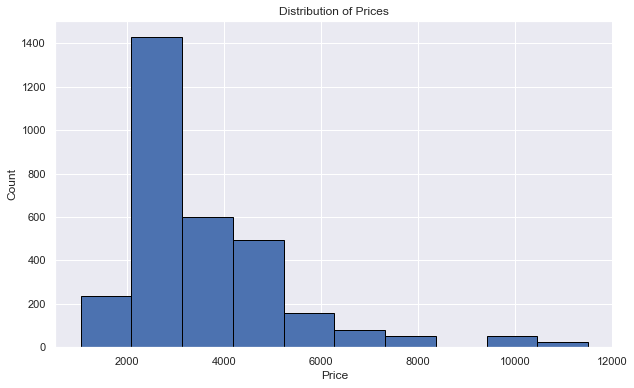

In [151]:
from matplotlib import figure
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 6))
plt.hist(ny_apts['price'], edgecolor='black');
plt.xlabel("Price")
plt.ylabel('Count')
plt.title("Distribution of Prices");
plt.savefig('Histogram_of_overall_prices.png')

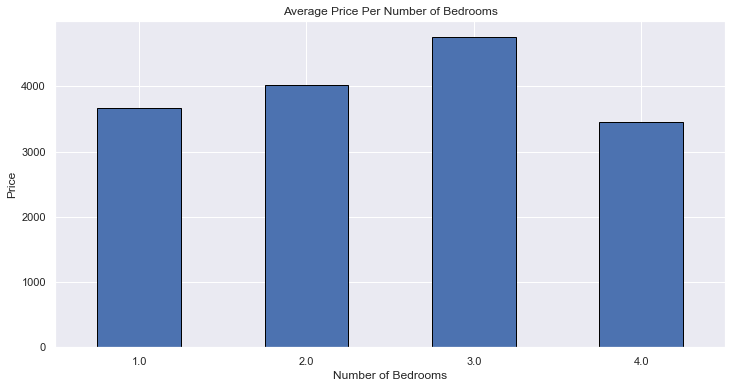

In [143]:
plt.figure(figsize=(12,6))
result_bed = ny_apts.groupby('number bedrooms')['price'].mean().plot(kind='bar', color='b',edgecolor = 'black')
plt.ylabel("Price");
plt.xlabel("Number of Bedrooms")
plt.xticks(rotation=0)
plt.title("Average Price Per Number of Bedrooms");
plt.savefig('average_price_per_number_of_bedrooms.png')


In [179]:
 ny_apts.groupby('neighborhood')['posted'].count()

neighborhood
Chelsea                52
Chinatown             182
Downtown               52
East Harlem            52
East Village          182
Financial District    546
Flatiron               52
Greenwich Village      26
Harlem                 52
Inwood                 52
Lower East Side       104
Midtown East          130
Midtown West          234
Murray Hill           182
New York               26
Nolita                104
Soho                  104
Tribeca                78
Upper East Side       442
Upper Manhattan        52
Upper West Side       260
West Village          156
Name: posted, dtype: int64

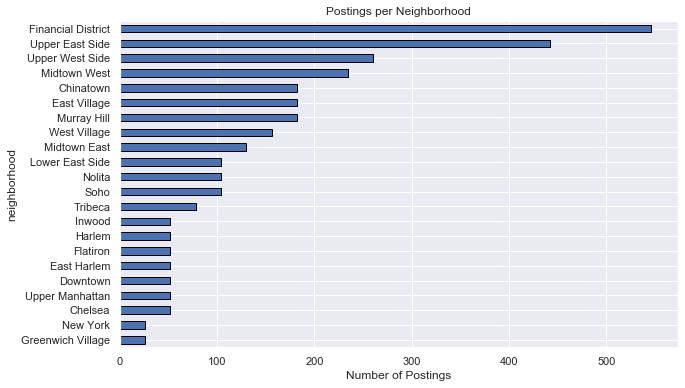

In [205]:
plt.figure(figsize=(10, 6))
result_count = ny_apts.groupby('neighborhood')['posted'].count().sort_values().plot(kind='barh', color='b',edgecolor = 'black')
plt.xlabel("Number of Postings");
plt.xticks(rotation=0)
plt.title("Postings per Neighborhood");
plt.savefig('postings_per_neighborhood.png')

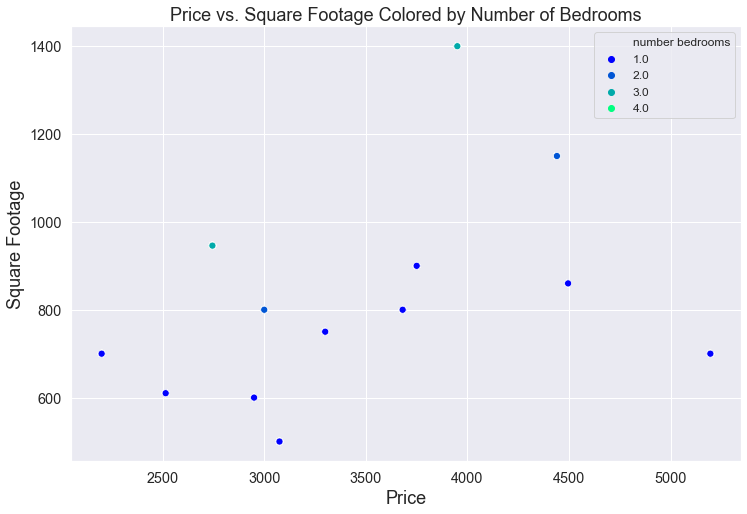

In [153]:

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

plt.figure(figsize=(12, 8))
sns.scatterplot(x='price', y='sqft',hue= ny_apts['number bedrooms'], palette='winter', x_jitter=True, y_jitter=True, s=50, data=ny_apts.dropna())
plt.legend(fontsize=12)
plt.xlabel("Price", fontsize=18)
plt.ylabel("Square Footage", fontsize=18);
plt.title("Price vs. Square Footage Colored by Number of Bedrooms", fontsize=18);
plt.savefig('scatterplot_of_squarefootage_price.png')


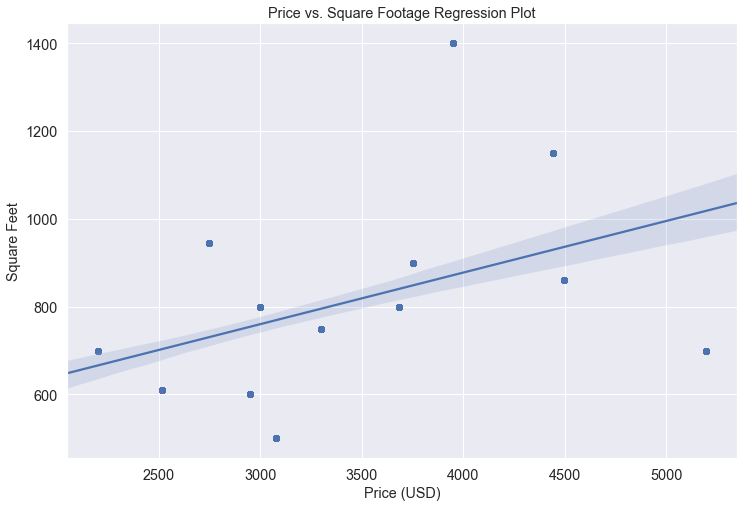

In [161]:
plt.figure(figsize=(12, 8))
sns.regplot(x='price', y='sqft', data=ny_apts.dropna());
plt.title('Price vs. Square Footage Regression Plot');
plt.xlabel("Price (USD)");
plt.ylabel("Square Feet");
plt.savefig('scatterplot_with_linebf.png')

In [160]:
ny_apts.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True) #was getting a row called unnamed: 0
ny_apts.drop(["a"], axis=1, inplace=True) 
ny_apts.corr()


,number bedrooms,sqft,price
number bedrooms,1.000000,0.762098,0.125243
sqft,0.762098,1.000000,0.601228
price,0.125243,0.601228,1.000000


In [165]:
ny_apts.groupby('neighborhood').mean()

,number bedrooms,sqft,price
neighborhood,,,
Chelsea,1.000000,700.0,5545.000000
Chinatown,2.000000,NaN,2862.142857
Downtown,2.000000,NaN,4062.500000
East Harlem,3.000000,598.0,2167.500000
East Village,1.428571,NaN,3574.857143
Financial District,1.687500,610.0,3503.476190
Flatiron,1.000000,NaN,5116.500000
Greenwich Village,1.000000,NaN,4995.000000
Harlem,2.500000,700.0,1625.000000


In [164]:
#group by neighborhood
ny_apts.groupby('neighborhood').mean()['price'].sort_values()

neighborhood
Harlem                1625.000000
New York              1850.000000
Inwood                2145.000000
East Harlem           2167.500000
Upper Manhattan       2572.500000
Lower East Side       2606.750000
Chinatown             2862.142857
Upper East Side       3114.588235
Midtown West          3209.777778
West Village          3254.166667
Financial District    3503.476190
Murray Hill           3548.571429
East Village          3574.857143
Upper West Side       3912.500000
Downtown              4062.500000
Nolita                4085.000000
Midtown East          4781.200000
Greenwich Village     4995.000000
Flatiron              5116.500000
Chelsea               5545.000000
Soho                  6022.500000
Tribeca               6748.333333
Name: price, dtype: float64

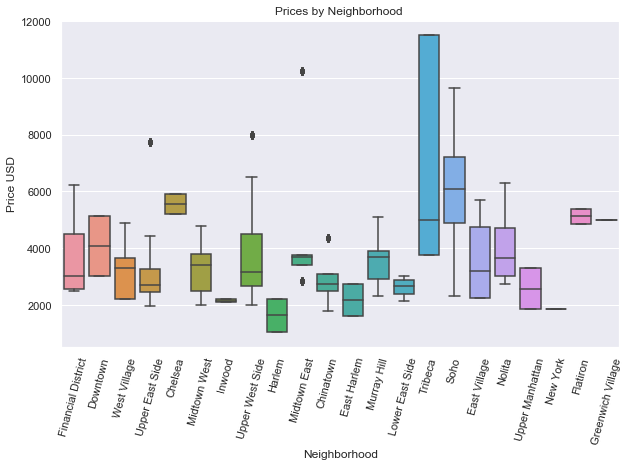

In [206]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='neighborhood', y='price', data=ny_apts)
plt.xlabel("Neighborhood");
plt.xticks(rotation=75)
plt.ylabel("Price USD");
plt.title("Prices by Neighborhood ");
plt.savefig('Boxplot_Neighborhood.png')

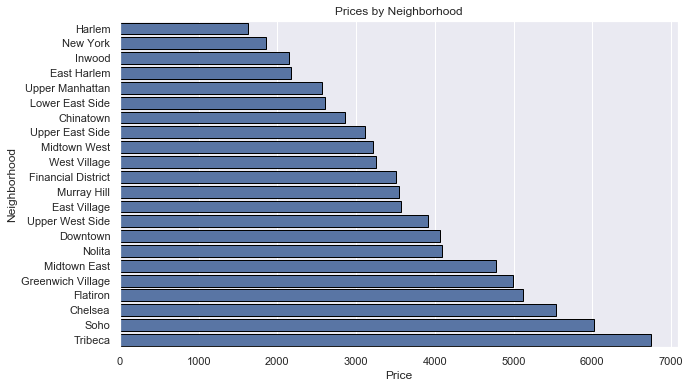

In [200]:
result = ny_apts.groupby(["neighborhood"])['price'].aggregate(np.mean).reset_index().sort_values('price')
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='price', y='neighborhood', ci = None,color = "b",data=ny_apts, order = result['neighborhood'], edgecolor = "Black")
plt.xlabel("Price");
plt.ylabel("Neighborhood");
plt.xticks(rotation=0)
plt.title("Prices by Neighborhood");
plt.savefig('Prices_by_neighborhood.png')